In [14]:
# CompareAugmentation.ipynb

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, auc

import os





In [9]:
# Loadingl Models 
baseline_model = tf.keras.models.load_model("baseline_model.keras")
augmented_model = tf.keras.models.load_model( 'mobilenet_augmented.keras')


2025-07-13 20:58:20.276902: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [10]:

#  Loading the Validation Dataset 
image_size = (180, 180)
batch_size = 16
val_ds = tf.keras.utils.image_dataset_from_directory(
    "food_6",
    validation_split=0.2,
    subset="validation",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
    label_mode="categorical"
)
val_ds = val_ds.prefetch(tf.data.AUTOTUNE)

Found 500 files belonging to 5 classes.
Using 100 files for validation.


In [11]:


# Collect Predictions
def get_predictions_and_labels(model, dataset):
    y_true = []
    y_pred = []
    for x, y in dataset:
        y_true.append(y.numpy())
        y_pred.append(model.predict(x))
    return np.concatenate(y_true), np.concatenate(y_pred)

y_true_base, y_pred_base = get_predictions_and_labels(baseline_model, val_ds)
y_true_aug, y_pred_aug = get_predictions_and_labels(augmented_model, val_ds)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 888ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 818ms/step


2025-07-13 20:58:28.451900: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 904ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 812ms/step


2025-07-13 20:58:31.328468: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [12]:
#  ROC Curves 
def plot_roc(y_true, y_pred, label):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    n_classes = y_true.shape[1]
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        plt.plot(fpr[i], tpr[i], label=f"{label} - Class {i} (AUC = {roc_auc[i]:.2f})")

    plt.plot([0, 1], [0, 1], "k--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curves")
    plt.legend(loc="lower right")

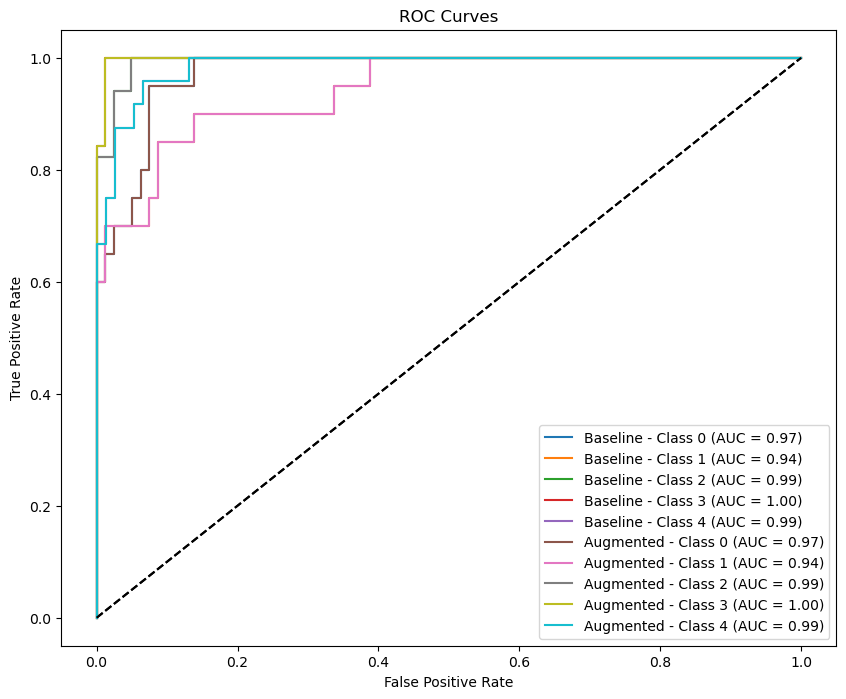

In [13]:

# Plotting theg ROC Comparison 
plt.figure(figsize=(10, 8))
plot_roc(y_true_base, y_pred_base, "Baseline")
plot_roc(y_true_aug, y_pred_aug, "Augmented")
plt.show()
